In [1]:
# Copyright IonQ Inc., all rights reserved
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import json

%matplotlib inline

In [2]:
df = pd.read_json("../results/data_MSgates.json")
with open("../results/data_motionalModes.json", 'r') as f:
    motionalModes = json.load(f)

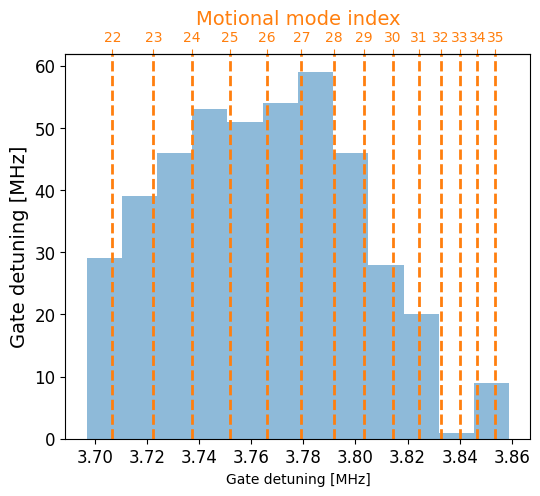

In [3]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.histplot(data=df, x='gateDetuningMHz', alpha=0.5, ec=None, bins=12)
ax.set_xlabel('Gate detuning [MHz]')
modes = []
detunings = []
for mode, detuning in motionalModes.items():
    if int(mode)>df['nearestMode'].min():
        modes.append(int(mode))
        detunings.append(detuning)
        ax.axvline(detuning, color='C1', lw=2, linestyle='--')
ax.tick_params(axis='both', labelsize=12)
ax.set_ylabel('Count', fontsize=14)
ax.set_ylabel('Gate detuning [MHz]', fontsize=14)
ax1 = ax.secondary_xaxis('top')
ax1.tick_params(axis='x', color='C1', labelsize=10)
ax1.set_xticks(detunings, minor=False)
ax1.set_xticklabels(modes, color='C1')
ax1.set_xlabel('Motional mode index', color='C1', fontsize=14)
plt.savefig('MSgate_nearestmode_hist.pdf')

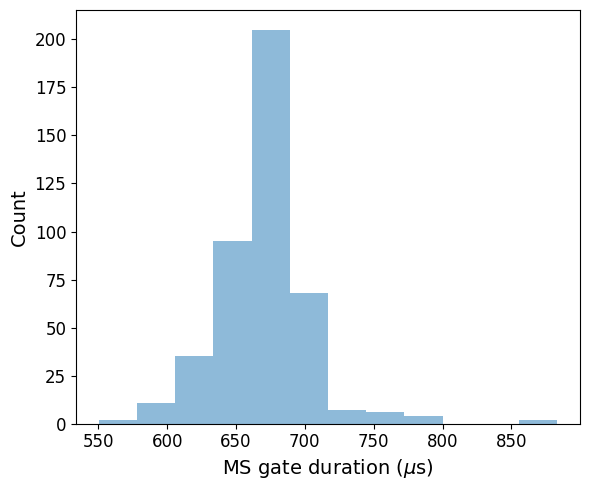

In [4]:
fig, ax = plt.subplots(figsize=(6,5))
ax = sns.histplot(data=df, x=df['gateDurationUsec'], stat='count', bins=12, alpha=0.5, ec=None, ax=ax)
ax.set_ylabel('Count', fontsize=14);
ax.set_xlabel(r'MS gate duration ($\mu$s)', fontsize=14)
ax.tick_params(axis='both', labelsize=12)
fig.tight_layout()

plt.savefig('MSgate_duration_hist.pdf')